In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [12]:
df = pd.read_csv('/home/amadgakkhar/code/MLOps-Project/dataset.csv')
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [13]:
print(df.shape)
print(list(df.columns))

(5110, 12)
['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [14]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Separate Categorical and Numerical Features

In [16]:
cat_features = [feature for feature in df.columns if df[feature].dtype=='O']
num_features = [feature for feature in df.columns if df[feature].dtype!='O']

print(f"We have {len(cat_features)} categorical features, which are ")
print(cat_features)

print(f"We have {len(num_features)} numerical features, which are ")
print(num_features)

We have 5 categorical features, which are 
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
We have 7 numerical features, which are 
['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [17]:
# We will combine cata and discrete features
# len(df['hypertension'].unique())
disc_features = cat_features + [feature for feature in num_features if len(df[feature].unique()) < 10]
print(disc_features)

cont_features = [feature for feature in num_features if feature not in disc_features]
cont_features.remove('id')
print(cont_features)



['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke']
['age', 'avg_glucose_level', 'bmi']


In [1]:
for col in disc_features:
    print(f"Feature name :  {col}")
    print(f"Unique Values and their proportion {df[col].value_counts(normalize=True) * 100}")
    print("*-*-*-*-*-*-*-*")

NameError: name 'disc_features' is not defined

In [19]:
for col in cont_features:
    print(f"Feature name :  {col}")
    print(f"Unique Values and their proportion {df[col].value_counts(normalize=True) * 100}")
    print("*-*-*-*-*-*-*-*")
Private          
Self-employed
children       
Govt_job         
Never_worked      

Feature name :  age
Unique Values and their proportion age
78.00    1.996086
57.00    1.859100
52.00    1.761252
54.00    1.702544
51.00    1.682975
           ...   
1.40     0.058708
0.48     0.058708
0.16     0.058708
0.40     0.039139
0.08     0.039139
Name: proportion, Length: 104, dtype: float64
*-*-*-*-*-*-*-*
Feature name :  avg_glucose_level
Unique Values and their proportion avg_glucose_level
93.88     0.117417
91.68     0.097847
91.85     0.097847
83.16     0.097847
73.00     0.097847
            ...   
111.93    0.019569
94.40     0.019569
95.57     0.019569
66.29     0.019569
85.28     0.019569
Name: proportion, Length: 3979, dtype: float64
*-*-*-*-*-*-*-*
Feature name :  bmi
Unique Values and their proportion bmi
28.7    0.835201
28.4    0.774088
26.7    0.753718
27.6    0.753718
26.1    0.753718
          ...   
48.7    0.020371
49.2    0.020371
51.0    0.020371
49.4    0.020371
14.9    0.020371
Name: proportion, Length: 418, dtype: float64
*-*-*-*-*-*-*-*


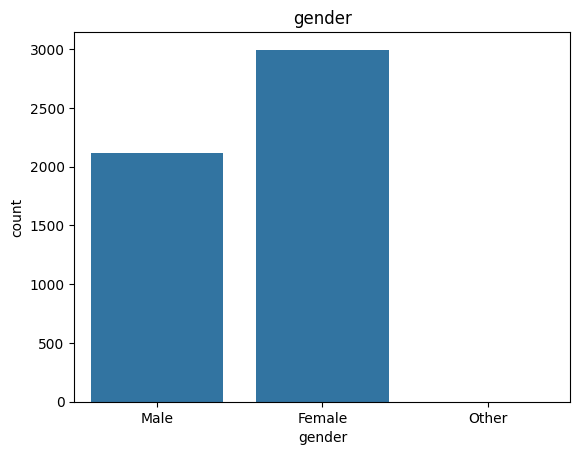

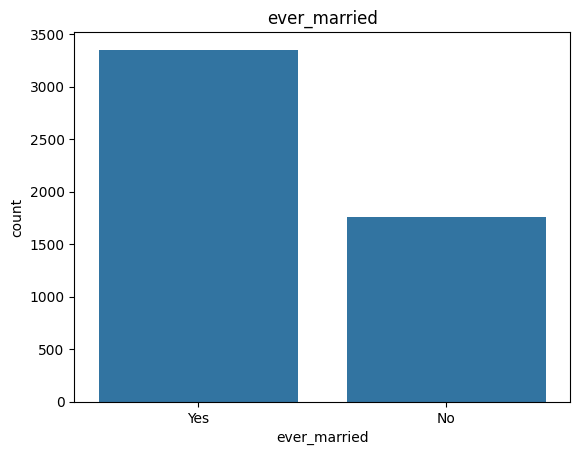

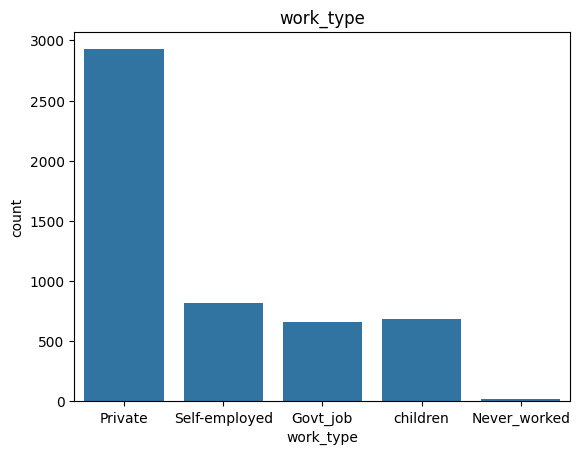

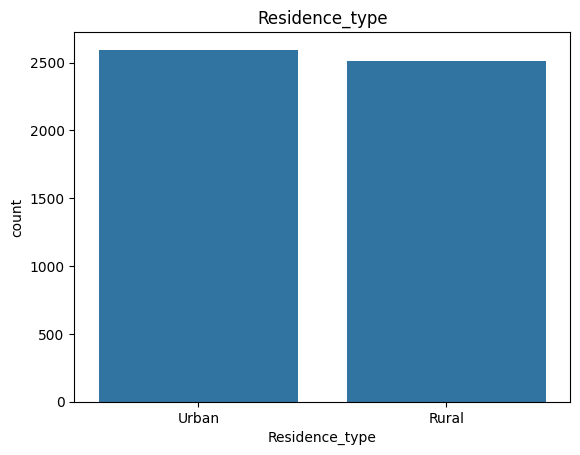

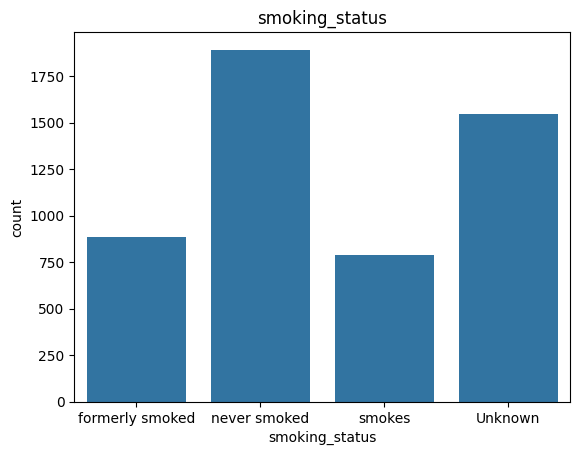

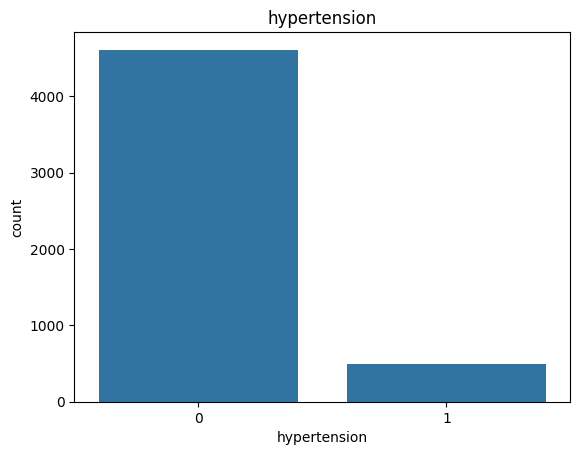

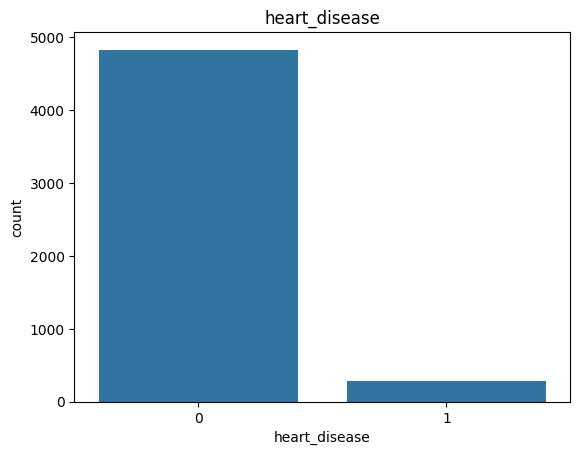

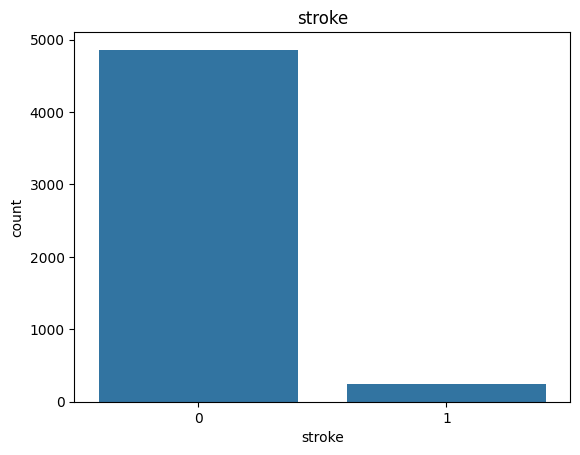

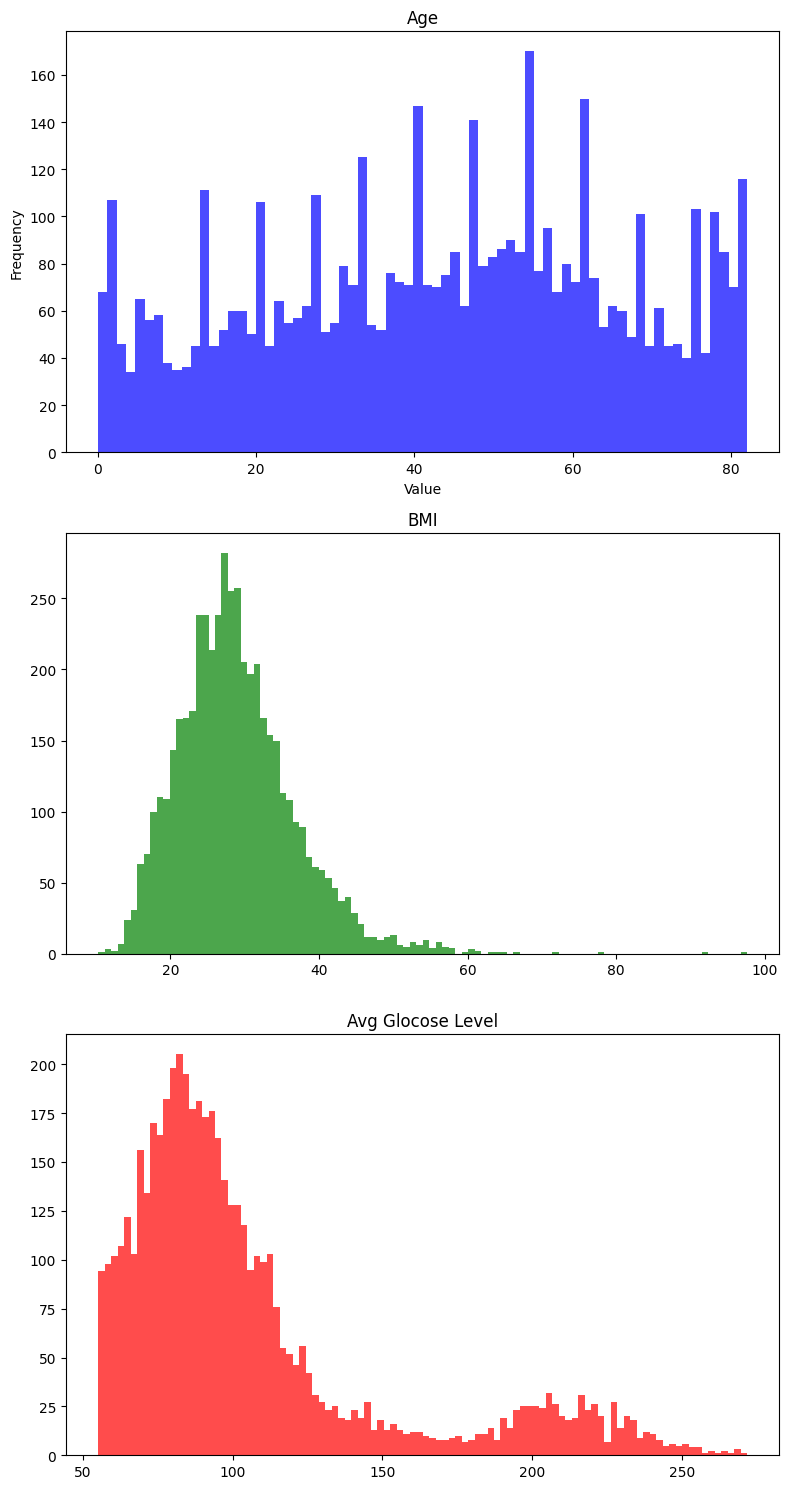

In [20]:
# fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 10)) # 5 cat features, 7 num features

for feature in (disc_features):
    plt.figure()
    sns.countplot(x=feature, data=df)
    plt.title(feature)


# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 15))

# Create histograms on each subplot
axs[0].hist(df['age'], bins=70, alpha=0.7, color='blue')
axs[1].hist(df['bmi'], bins=100, alpha=0.7, color='green')
axs[2].hist(df['avg_glucose_level'], bins=100, alpha=0.7, color='red')


# Set titles and labels
axs[0].set_title('Age')
axs[1].set_title('BMI')
axs[2].set_title('Avg Glocose Level')

axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()

<Axes: >

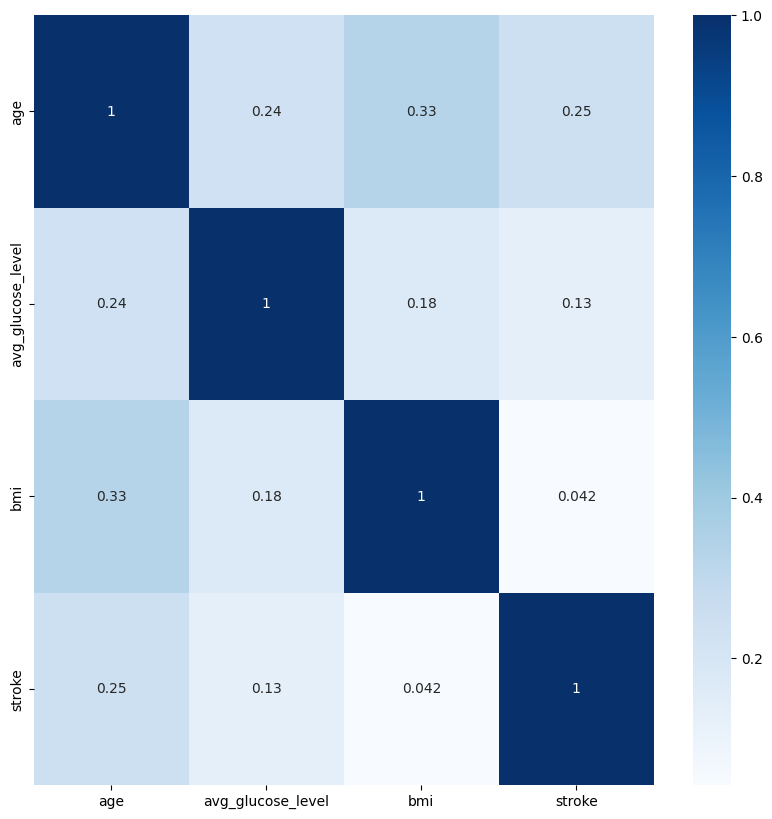

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df[cont_features+['stroke']].corr(),cbar=True,annot=True,cmap='Blues')

## Data Cleaning and FE Tasks
1.  Substitute Missing values in BMI Column
2.  work_type column can be modified to combine [children and never_worked]
3.  We will treat Unkown status in smoking status as Missing value and will try to impute it.
4.  Remove skewness from data [stroke, heart_disease, hypertension, avg_glucose_level, BMI]

### Substitute Missing Values

In [22]:
X = df.copy()
X.dropna(axis = 0, inplace=True) #temporary
y = X.pop("stroke")

In [23]:



# OH encoding for categoricals
enc_features = [colname for colname in X.select_dtypes("object")]

# X[colname], _ = X[colname].factorize()

# print(enc_features)
col_names = {}
for feature in enc_features:
    unique_values = X[feature].unique()
    new_col_names = [name+ "+" + feature for name in unique_values]
    # print(new_col_names)
    col_names[feature] = new_col_names
    
# print(col_names)

for key in col_names:
    for item in col_names[key]:
        X[item] = [1 if dum == item.split('+')[0] else 0 for dum in X[key]]

    # print(X[[key] + col_names[key]])
    


#Removing unnecessary columns
#

X.drop(enc_features, axis = 1, inplace = True)
X.drop(['id','Other+gender', 'Female+gender','No+ever_married','children+work_type','Never_worked+work_type','Rural+Residence_type','Unknown+smoking_status' ], axis = 1, inplace = True)
print(X.columns)
print(X.info())

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'Male+gender', 'Yes+ever_married', 'Private+work_type',
       'Self-employed+work_type', 'Govt_job+work_type', 'Urban+Residence_type',
       'formerly smoked+smoking_status', 'never smoked+smoking_status',
       'smokes+smoking_status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4909 non-null   float64
 1   hypertension                    4909 non-null   int64  
 2   heart_disease                   4909 non-null   int64  
 3   avg_glucose_level               4909 non-null   float64
 4   bmi                             4909 non-null   float64
 5   Male+gender                     4909 non-null   int64  
 6   Yes+ever_married                4909 non-null   int64  
 7  

age                               False
hypertension                       True
heart_disease                      True
avg_glucose_level                 False
bmi                               False
Male+gender                        True
Yes+ever_married                   True
Private+work_type                  True
Self-employed+work_type            True
Govt_job+work_type                 True
Urban+Residence_type               True
formerly smoked+smoking_status     True
never smoked+smoking_status        True
smokes+smoking_status              True
dtype: bool


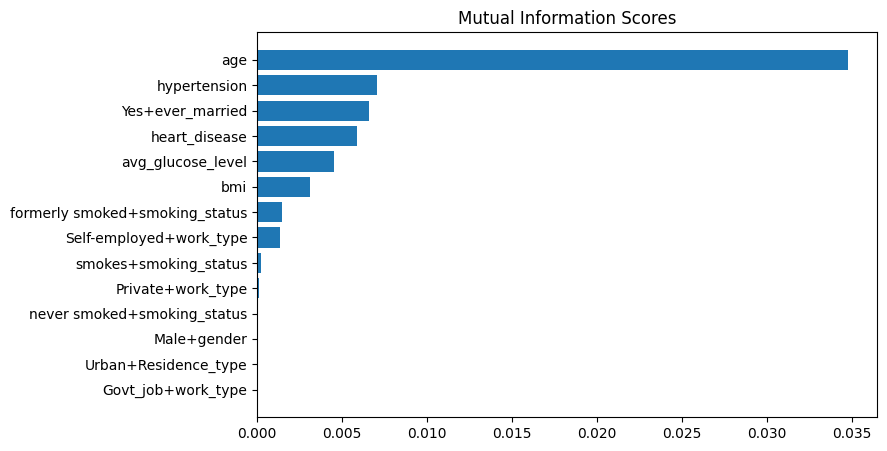

In [24]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


discrete_features = X.dtypes==int
print(discrete_features)
mi_scores = make_mi_scores(X, y, discrete_features = discrete_features)
mi_scores[::3]  # show a few features with their MI scores



def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)



## Remove Skewness using Power Transform

In [25]:
X[cont_features].skew(axis=0, skipna=True)

age                 -0.119070
avg_glucose_level    1.614026
bmi                  1.055340
dtype: float64

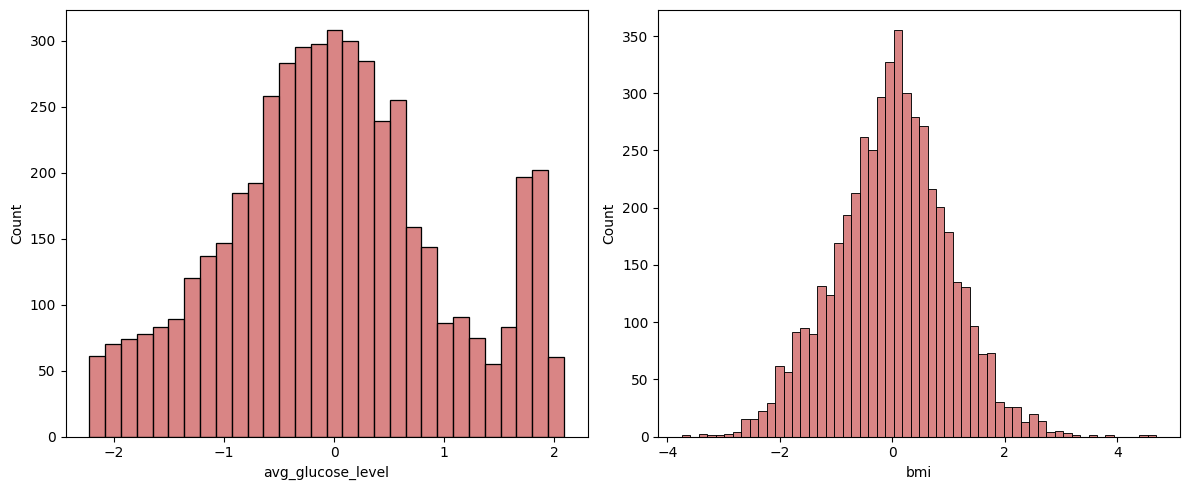

In [26]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['avg_glucose_level', 'bmi']
X_copy = pt.fit_transform(X[transform_features])
X_copy = pd.DataFrame(X_copy, columns=transform_features)

plt.figure(figsize=(12, 5))
for i, col in enumerate(transform_features):
    plt.subplot(1, 2, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()


In [27]:
print(X_copy.columns)
X_copy[transform_features].skew(axis=0, skipna=True)

Index(['avg_glucose_level', 'bmi'], dtype='object')


avg_glucose_level    0.079093
bmi                 -0.000742
dtype: float64

In [28]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

X = df.copy()
X.drop('id', axis = 1,inplace = True)
X.dropna(axis = 0, inplace=True) #temporary
y = X.pop("stroke")

cat_features = [feature for feature in X.columns if X[feature].dtype=='O']
num_features = [feature for feature in X.columns if X[feature].dtype!='O']

# print(num_features)
# print(cat_features)
# print(enc_features)

transform_features = ['avg_glucose_level', 'bmi']



numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, enc_features),
        
        ("Transformer", transform_pipe, transform_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)


In [27]:
X = preprocessor.fit_transform(X)
print(X.shape)
print(X)

# X_copy = pd.DataFrame(X_copy, columns=transform_features)

(4909, 23)
[[ 0.          1.          0.         ...  4.38196829  2.77769839
   0.98134488]
 [ 0.          1.          0.         ...  4.38196829  0.0138418
   0.45926914]
 [ 1.          0.          0.         ... -0.22820795  1.48413156
   0.70120668]
 ...
 [ 1.          0.          0.         ... -0.22820795 -0.50236926
   0.21733161]
 [ 0.          1.          0.         ... -0.22820795  1.37291993
  -0.41934612]
 [ 1.          0.          0.         ... -0.22820795 -0.45081569
  -0.34294479]]


## Handling Imbalance Problem using SMOTE

SMOTEENN Algorithm: A Detailed Explanation


SMOTEENN is a hybrid algorithm that combines the strengths of SMOTE (Synthetic Minority Over-sampling Technique) and Tomek Links for handling imbalanced datasets. Here's a step-by-step explanation of the SMOTEENN algorithm:

Step 1: SMOTE (Synthetic Minority Over-sampling Technique)

    Identify minority class samples: Select samples from the minority class.
    Find k-nearest neighbors: For each minority class sample, find its k-nearest neighbors (typically k=5).
    Interpolate new samples: Create new samples by interpolating between the minority class sample and its k-nearest neighbors.
    Add new samples: Add the newly created samples to the minority class.

Step 2: Tomek Links

    Find Tomek Links: Identify pairs of samples (one from the majority class and one from the minority class) that are close to each other (i.e., within a certain distance threshold).
    Remove majority class samples: Remove the majority class samples from the identified Tomek Links.

Step 3: Combine SMOTE and Tomek Links

    Apply SMOTE: Apply the SMOTE algorithm to the minority class samples.
    Apply Tomek Links: Apply the Tomek Links algorithm to the resampled dataset.
    Return resampled dataset: Return the final resampled dataset.

Benefits of SMOTEENN

    Balances class distribution: SMOTEENN helps balance the class distribution by oversampling the minority class and undersampling the majority class.
    Reduces noise: Tomek Links removes noisy majority class samples that are close to the minority class samples.
    Improves model performance: By balancing the class distribution and reducing noise, SMOTEENN can improve the performance of machine learning models on imbalanced datasets.

By combining the strengths of SMOTE and Tomek Links, SMOTEENN provides a powerful technique for handling imbalanced datasets.

In [30]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

print(X_res.shape)
print(y_res.shape)



ValueError: could not convert string to float: 'Male'

## Train Test Split

In [30]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape


((6786, 23), (1697, 23))

In [32]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


In [33]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc


In [34]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}


In [35]:
def evaluate_models(X, y, models):
  
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

## Model Training

In [36]:
base_model_report =evaluate_models(X=X_res, y=y_res, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9894
- F1 score: 0.9903
- Precision: 0.9924
- Recall: 0.9881
- Roc Auc Score: 0.9895


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9576
- F1 score: 0.9610
- Precision: 0.9662
- Recall: 0.9558
- Roc Auc Score: 0.9578


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9531
- F1 score: 0.9568
- Precision: 0.9531
- Recall: 0.9604
- Roc Auc Score: 0.9525
----------------------------------
Model performance for Test set
- Accuracy: 0.9481
- F1 score: 0.9526
- Precision: 0.9506
- Recall: 0.9547
- Roc Auc Score: 0.9475


Logistic Regression
Model performance for Training 

In [37]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.989393
6,CatBoosting Classifier,0.978786
4,K-Neighbors Classifier,0.977608
5,XGBClassifier,0.977608
1,Decision Tree,0.957572
2,Gradient Boosting,0.948144
7,Support Vector Classifier,0.926930
8,AdaBoost Classifier,0.916323
3,Logistic Regression,0.839128


## HyperParameter Tuning

In [52]:
# KNeighborsClassifier?
XGBClassifier?
# CatBoostClassifier?

Init signature:
XGBClassifier(
    *,
    objective: Union[str, xgboost.sklearn._SklObjWProto, Callable[[Any, Any], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic',
    **kwargs: Any,
) -> None
Docstring:     
Implementation of the scikit-learn API for XGBoost classification.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : Optional[int]
        Number of boosting rounds.

    max_depth :  typing.Union[int, NoneType]

        Maximum tree depth for base learners.

    max_leaves : typing.Union[int, NoneType]

        Maximum number of leaves; 0 indicates no limit.

    max_bin : typing.Union[int, NoneType]

        If using histogram-based algorithm, maximum number of bins per feature

    grow_policy : typing.Union[str, NoneType]

        Tree growing policy.

        - depthwise: Favors splitting at nodes closest to the node,
        - lossguide: Favors splitting at nodes with highest loss change.

    learning_

In [30]:
# Initialize few parameter for Hyperparamter tuning

xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

cb_params = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [3, 6]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}


In [3]:
import os
import importlib
from heart_disease_prediction.utils.main_utils import read_yaml_file

model_schema = read_yaml_file(file_path='/home/amadgakkhar/code/MLOps-Project/config/model.yaml')
print(type(model_schema))
# print(list(model_schema['model_selection'].keys()))
model_names = list(model_schema['model_selection'].keys())
# print(model_names)
model_list = []
for model in model_names:
    module_name = model_schema['model_selection'][model]['module']
    class_name = model_schema['model_selection'][model]['class']
    module = importlib.import_module(module_name)

    class_ = getattr(module, class_name)
    classifier = class_()
    model_list.append(classifier)

# print(model_list)
        


<class 'dict'>


In [4]:
import importlib
module_name = model_schema['model_selection']['module_0']['module']
class_name = model_schema['model_selection']['module_0']['class']


# Import the module
module = importlib.import_module(module_name)

# Get the class from the module
class_ = getattr(module, class_name)
class_
# Now you can use the class
# classifier = class_()
# classifier

# print(model_schema['model_selection']['module_0']['search_param_grid']
# )
# my_module = importlib.import_module(module_name)
# my_module

sklearn.neighbors._classification.KNeighborsClassifier

In [5]:
grid_search_list = []

for model in list(model_schema['model_selection'].keys()):
    module_name = model_schema['model_selection'][model]['module']
    class_name = model_schema['model_selection'][model]['class']
    params = model_schema['model_selection'][model]['search_param_grid']

    # Import the module
    module = importlib.import_module(module_name)
    class_ = getattr(module, class_name)
    classifier = class_()
    classifier
    
    grid_search_list.append((class_name, classifier, params))





In [6]:
print(grid_search_list)

[('KNeighborsClassifier', KNeighborsClassifier(), {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform', 'distance'], 'n_neighbors': [3, 5, 9]}), ('RandomForestClassifier', RandomForestClassifier(), {'max_depth': [10, 15, 20], 'max_features': ['sqrt', 'log2'], 'n_estimators': [3, 5, 9]})]


In [31]:
randomcv_models = [

    ("KNN", KNeighborsClassifier(), knn_params)
]
randomcv_models

[('KNN',
  KNeighborsClassifier(),
  {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
   'weights': ['uniform', 'distance'],
   'n_neighbors': [3, 4, 5, 7, 9]})]

In [10]:
from sklearn.model_selection import GridSearchCV


# randomcv_models = [
#     ('XGBoost', XGBClassifier(), xgboost_params),
#     ("CatBoost", CatBoostClassifier(), cb_params),
#     ("KNN", KNeighborsClassifier(), knn_params)
# ]


model_param = {}
for name, model, params in grid_search_list:
    random = GridSearchCV(estimator=model,param_grid= params,cv=3,verbose=3, 
)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])


NameError: name 'X_res' is not defined

In [47]:
model_param

{'XGBoost': {'min_child_weight': 1, 'max_depth': 9},
 'CatBoost': {'learning_rate': 0.1, 'iterations': 200, 'depth': 6},
 'KNN': {'weights': 'uniform', 'n_neighbors': 4, 'algorithm': 'auto'}}

In [48]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "CatBoostClassifier": CatBoostClassifier(**model_param['CatBoost']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
}
tuned_report =evaluate_models(X=X_res, y=y_res, models=best_models)


0:	learn: 0.6120050	total: 28.8ms	remaining: 5.72s
1:	learn: 0.5289298	total: 46.2ms	remaining: 4.57s
2:	learn: 0.4756468	total: 62.4ms	remaining: 4.1s
3:	learn: 0.4409938	total: 85.9ms	remaining: 4.21s
4:	learn: 0.4124370	total: 104ms	remaining: 4.06s
5:	learn: 0.3906364	total: 122ms	remaining: 3.95s
6:	learn: 0.3658258	total: 138ms	remaining: 3.81s
7:	learn: 0.3379852	total: 154ms	remaining: 3.7s
8:	learn: 0.3197045	total: 170ms	remaining: 3.61s
9:	learn: 0.3020037	total: 187ms	remaining: 3.55s
10:	learn: 0.2903649	total: 203ms	remaining: 3.49s
11:	learn: 0.2765517	total: 219ms	remaining: 3.44s
12:	learn: 0.2636835	total: 243ms	remaining: 3.5s
13:	learn: 0.2540439	total: 261ms	remaining: 3.46s
14:	learn: 0.2463331	total: 277ms	remaining: 3.41s
15:	learn: 0.2408160	total: 292ms	remaining: 3.36s
16:	learn: 0.2333634	total: 306ms	remaining: 3.29s
17:	learn: 0.2252233	total: 321ms	remaining: 3.25s
18:	learn: 0.2163224	total: 340ms	remaining: 3.24s
19:	learn: 0.2073799	total: 356ms	remain

In [49]:
tuned_report

,Model Name,Accuracy
1,KNeighborsClassifier,0.992929
2,XGBClassifier,0.981732
0,CatBoostClassifier,0.979965


In [50]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)


FINAL MODEL 'KNN'
Accuracy Score value: 0.9929
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       770
           1       0.99      1.00      0.99       927

    accuracy                           0.99      1697
   macro avg       0.99      0.99      0.99      1697
weighted avg       0.99      0.99      0.99      1697



                Truth   Predicted

True Positive       1       1

True Negative       0       0

False Positive      0       1

False Negative      1       0

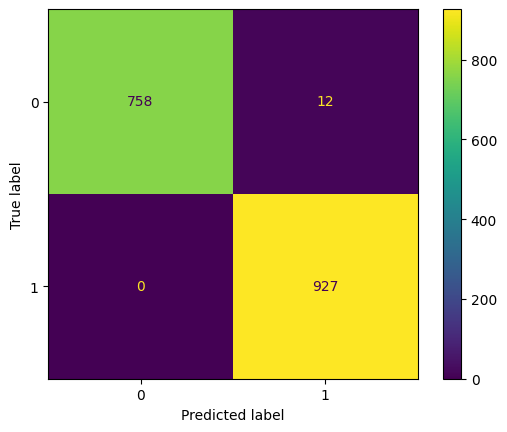

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
